# Training a classifier with gaze features for calculating predictions of various activities

__UbiComp Assignment 02, Task 01:__
This third notebook trains a classifier with select features and corresponding labels.
The features and labels are read from a given csv-file.

## Read data from a csv-file.

Note that the csv-file we are using here is generated by the FeatureCalculation Notebook.

In [22]:
!pip install -U scikit-learn xgboost pandas matplotlib

In [23]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

recording_location = './'

all_features_csv = os.path.join(recording_location, './Data/FeatureFiles/feature_list_all.csv')
df = pd.read_csv(all_features_csv)

## Prepare Data for Modeling
This section prepares the data by separating features and labels, and encoding the labels.

In [24]:
labels = df['label']
features = df.drop(columns=['label', 'duration', 'participant_id'])

# Encode string labels to integers (0, 1, 2) for XGBoost
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Scale features using StandardScaler for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Hyperparameter Tuning with GridSearchCV
This section uses GridSearchCV to find the best hyperparameters for the XGBoost model.

In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
print("Starting hyperparameter tuning for XGBoost...")
grid_search.fit(X_train_scaled, y_train)
print("Hyperparameter tuning complete.")

Starting hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.1s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=3, n_estimators=50; total time=   0.1s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=200; total time=   0.7s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=200; total time=   0.7s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=200; total time=   0.7s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=200; total time=   0.7s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=200; total time=   0.7s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=7, n_estimators=50; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=7, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=7, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=7, n_estimators=50; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.05, max_depth=7, n_estimators=50; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=100; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=100; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=100; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=200; total time=   0.8s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=200; total time=   0.8s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=200; total time=   0.8s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=200; total time=   0.7s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=200; total time=   0.8s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.1s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.1s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.1s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.6s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.6s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.6s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.6s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.6s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.6s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.6s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.6s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   0.6s
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.1s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.1s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.1s
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.1s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.2s
[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   0.4s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=   0.2s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=   0.2s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=   0.2s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   0.3s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   0.5s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   0.4s


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   0.5s
Hyperparameter tuning complete.


/Users/dom/miniconda3/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [14:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Evaluate the Best Model
This section evaluates the best model found by GridSearchCV on the test data.

Best parameters found: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
              precision    recall  f1-score   support

  Inspection       0.87      0.77      0.82        26
     Reading       0.96      0.96      0.96        26
      Search       0.79      0.88      0.83        25

    accuracy                           0.87        77
   macro avg       0.87      0.87      0.87        77
weighted avg       0.87      0.87      0.87        77



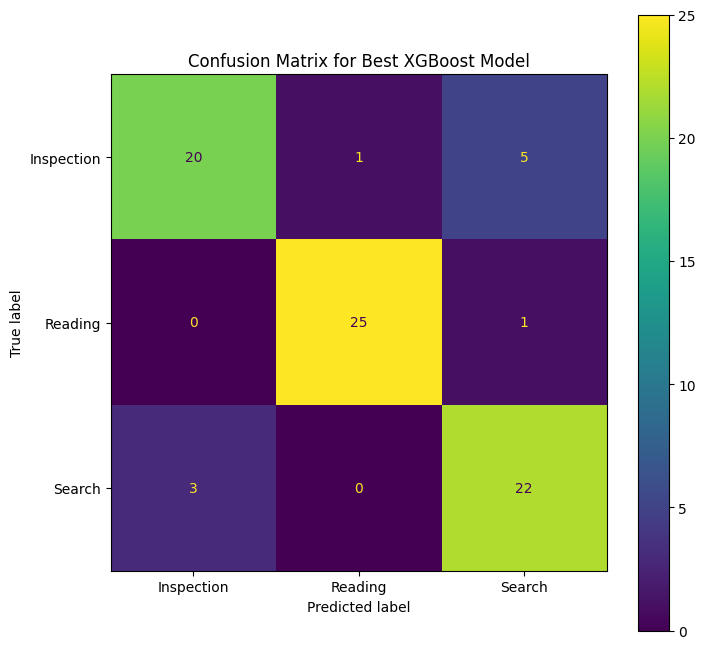

In [26]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

print(f"Best parameters found: {grid_search.best_params_}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test, display_labels=le.classes_, ax=ax, cmap='viridis')
plt.title("Confusion Matrix for Best XGBoost Model")
plt.show()

## Feature Importance
This section visualizes the importance of each feature in the model.

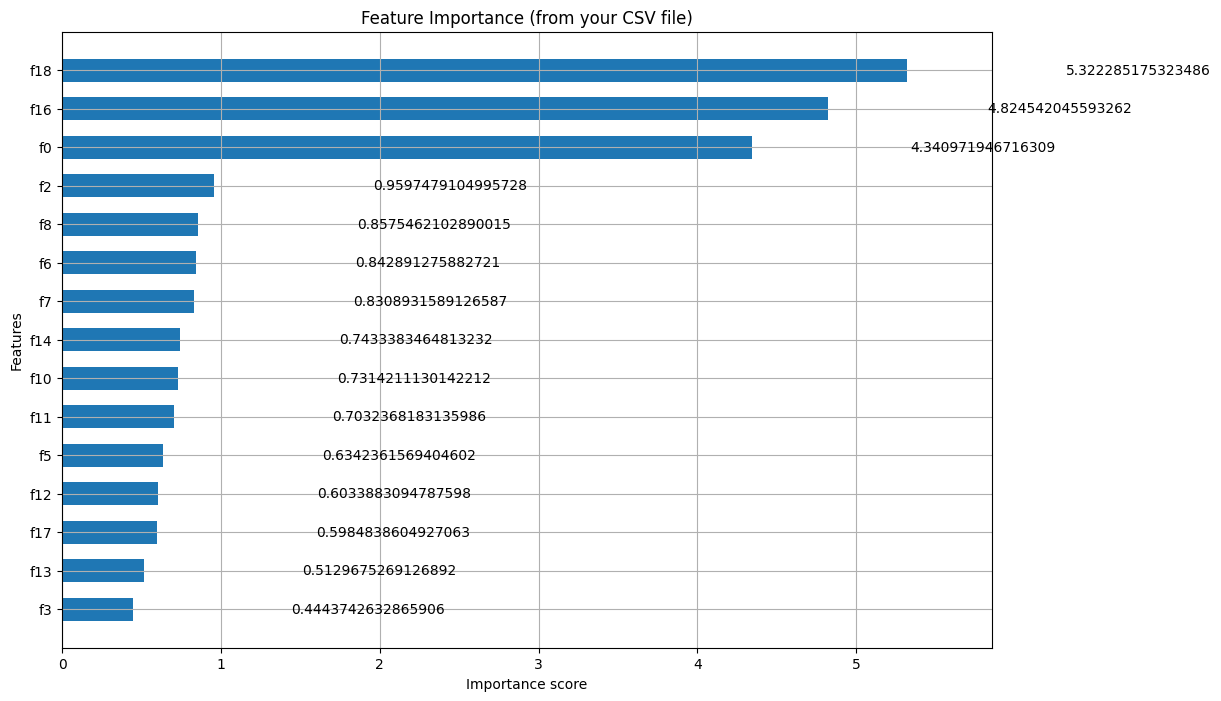

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(best_model, ax=ax, height=0.6, importance_type='gain')
plt.title("Feature Importance (from your CSV file)")
plt.show()

## Making Predictions on New Data
This section shows how to use the trained model to make predictions on new data.

In [28]:
# Example of new data (replace with your actual new data)
new_data = X_test.head(2) # Using two samples from the test set as an example
new_data_scaled = scaler.transform(new_data)

prediction_encoded = best_model.predict(new_data_scaled)
prediction_labels = le.inverse_transform(prediction_encoded)

prediction_proba = best_model.predict_proba(new_data_scaled)

print("New Data:")
display(new_data)

print("Predicted Activities:")
print(prediction_labels)

print("Prediction Probabilities:")
print(prediction_proba)

New Data:


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,freqDisPerSec,number_of_blinks,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB
194,276.633333,100,600,19661.412644,140.219159,0.073877,0.009017,0.406554,0.010327,0.101619,3.0,9,1118.444444,33,4600,0.9,0.689655,0.482759,120.994945
209,293.366667,100,966,34639.688506,186.117405,0.038157,0.027938,0.081865,0.000267,0.016353,3.0,6,1644.500000,100,4434,0.6,0.413793,0.620690,359.240822


Predicted Activities:
['Reading' 'Inspection']
Prediction Probabilities:
[[0.00584976 0.98774767 0.00640256]
 [0.9885876  0.0019939  0.00941846]]
